# Autoencoder with MNIST FCN

In [1]:
from __future__ import division, print_function
from keras.callbacks import ModelCheckpoint
from keras.layers import Input
from keras.layers.core import Dense, Lambda
from keras.models import Model
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

Using TensorFlow backend.


In [2]:
DATA_DIR = "../../data"
TRAIN_FILE = os.path.join(DATA_DIR, "mnist_train.csv")
TEST_FILE = os.path.join(DATA_DIR, "mnist_test.csv")

BATCH_SIZE = 128
NUM_FEATURES = 784
NUM_CLASSES = 10
NUM_EPOCHS = 10

BEST_MODEL = os.path.join(DATA_DIR, "keras-ae-mnist-fcn-best.h5")
FINAL_MODEL = os.path.join(DATA_DIR, "keras-ae-mnist-fcn-final.h5")

## Prepare Data

In [3]:
def parse_file(filename):
    xdata, ydata = [], []
    fin = open(filename, "rb")
    i = 0
    for line in fin:
        if i % 10000 == 0:
            print("{:s}: {:d} lines read".format(
                os.path.basename(filename), i))
        cols = line.strip().split(",")
        ydata.append(int(cols[0]))
        xdata.append([float(x) / 255. for x in cols[1:]])
        i += 1
    fin.close()
    print("{:s}: {:d} lines read".format(os.path.basename(filename), i))
    y = np.array(ydata)
    X = np.array(xdata)
    return X, y

Xtrain, ytrain = parse_file(TRAIN_FILE)
Xtest, ytest = parse_file(TEST_FILE)
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

mnist_train.csv: 0 lines read
mnist_train.csv: 10000 lines read
mnist_train.csv: 20000 lines read
mnist_train.csv: 30000 lines read
mnist_train.csv: 40000 lines read
mnist_train.csv: 50000 lines read
mnist_train.csv: 60000 lines read
mnist_test.csv: 0 lines read
mnist_test.csv: 10000 lines read
(60000, 784) (60000,) (10000, 784) (10000,)


## Define Network

In [4]:
inputs = Input(batch_shape=(None, NUM_FEATURES))
encoded = Dense(256, activation="relu")(inputs)
hidden = Dense(2, activation="relu")(encoded)
decoded = Dense(256, activation="relu")(hidden)
outputs = Dense(NUM_FEATURES, activation="relu")(decoded)

model = Model(inputs=inputs, outputs=outputs)

In [5]:
model.compile(optimizer="adam", loss="mean_squared_error")

## Train Network

In [6]:
history = model.fit(Xtrain, Xtrain, batch_size=BATCH_SIZE, 
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, Xtest))

/Users/palsujit/anaconda2/lib/python2.7/site-packages/Keras-2.0.4-py2.7.egg/keras/backend/tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s - loss: 0.0692 - val_loss: 0.0651

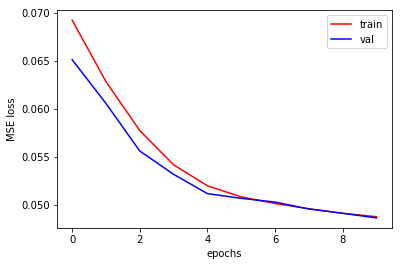

In [7]:
plt.plot(np.arange(NUM_EPOCHS), history.history["loss"], 
         color="r", label="train")
plt.plot(np.arange(NUM_EPOCHS), history.history["val_loss"], 
         color="b", label="val")
plt.xlabel("epochs")
plt.ylabel("MSE loss")
plt.legend(loc="best")

## Visualize autoencoder outputs

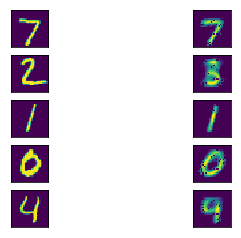

In [8]:
Xviz = Xtest[0:5]
Xviz_ = model.predict(Xviz)
j = 1
for i in range(5):
    img_orig = Xviz[i].reshape(28, 28)
    img_ae = Xviz_[i].reshape(28, 28)
    plt.subplot(5, 2, j)
    plt.imshow(img_orig)
    plt.xticks([])
    plt.yticks([])
    j += 1
    plt.subplot(5, 2, j)
    plt.imshow(img_ae)
    plt.xticks([])
    plt.yticks([])
    j += 1
plt.show()

## Visualize encoder embeddings

In [9]:
encoder = Model(inputs=inputs, outputs=hidden)
ytest_ = encoder.predict(Xtest)

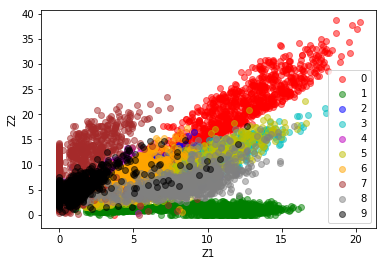

In [10]:
colors = ["r", "g", "b", "c", "m", "y", "orange", "brown", "gray", "k"]
for i in range(NUM_CLASSES):
    yi_indices = np.where(ytest == i)[0]
    xi = ytest_[yi_indices][:, 0].tolist()
    yi = ytest_[yi_indices][:, 1].tolist()
    plt.scatter(xi, yi, color=colors[i], alpha=0.5, label=str(i))
plt.legend(loc="best")
plt.xlabel("Z1")
plt.ylabel("Z2")
plt.show()